In [0]:
import numpy as np
import matplotlib.pyplot as plt 
from keras.layers import Input, Conv2D, Dense, Flatten, Dropout
from keras.models import Model

In [6]:
import keras
fashion_mnist = keras.datasets.fashion_mnist

(x_train,y_train),(x_test,y_test) = fashion_mnist.load_data()
x_train,x_test = x_train/255.0,x_test/255.0
print("x_train.shape: ",x_train.shape)

x_train.shape:  (60000, 28, 28)


In [7]:
x_train = np.expand_dims(x_train,-1)
x_test = np.expand_dims(x_test,-1)
print(x_train.shape)

(60000, 28, 28, 1)


In [8]:
K = len(set(y_train))
print("number of classes:",K)

number of classes: 10


In [9]:
x_train[0].shape

(28, 28, 1)

In [0]:
i = Input(shape = x_train[0].shape)
x = Conv2D(32,(3,3),strides=2,activation='relu')(i)
x = Conv2D(64,(3,3),strides=2,activation='relu')(x)
x = Conv2D(128,(3,3),strides = 2,activation='relu')(x)
x = Flatten()(x)
x = Dropout(0.2)(x)
x = Dense(512,activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(K,activation='softmax')(x)

model = Model(i,x)

In [11]:
model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])
r = model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs = 15)

Train on 60000 samples, validate on 10000 samples
Epoch 1/15
60000/60000 [==============================] - 31s 514us/step - loss: 0.5351 - accuracy: 0.8030 - val_loss: 0.4101 - val_accuracy: 0.8519
Epoch 2/15
60000/60000 [==============================] - 31s 512us/step - loss: 0.3684 - accuracy: 0.8622 - val_loss: 0.3455 - val_accuracy: 0.8707
Epoch 3/15
60000/60000 [==============================] - 31s 511us/step - loss: 0.3162 - accuracy: 0.8804 - val_loss: 0.3177 - val_accuracy: 0.8800
Epoch 4/15
60000/60000 [==============================] - 31s 512us/step - loss: 0.2814 - accuracy: 0.8934 - val_loss: 0.2952 - val_accuracy: 0.8881
Epoch 5/15
60000/60000 [==============================] - 30s 506us/step - loss: 0.2551 - accuracy: 0.9030 - val_loss: 0.2948 - val_accuracy: 0.8930
Epoch 6/15
60000/60000 [==============================] - 30s 507us/step - loss: 0.2328 - accuracy: 0.9117 - val_loss: 0.2852 - val_accuracy: 0.8997
Epoch 7/15
60000/60000 [==============================] 

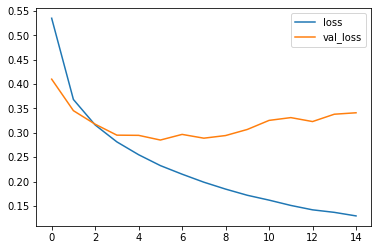

In [12]:
plt.plot(r.history['loss'],label='loss')
plt.plot(r.history['val_loss'],label='val_loss')
plt.legend()

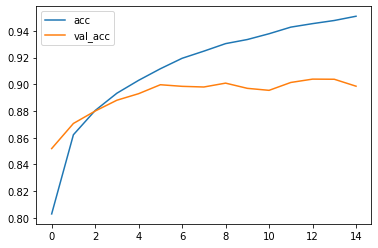

In [13]:
plt.plot(r.history['accuracy'],label='acc')
plt.plot(r.history['val_accuracy'],label='val_acc')
plt.legend()

Confusion matrix without normalization
[[859   1  15  16   2   1 101   0   5   0]
 [  6 968   0  18   4   0   3   0   1   0]
 [ 31   0 823   9  43   0  91   0   3   0]
 [ 16   1  16 921  25   0  20   0   1   0]
 [  3   1  69  22 827   0  75   0   3   0]
 [  1   0   0   0   0 980   0  13   2   4]
 [115   1  45  28  85   1 717   0   8   0]
 [  0   0   0   0   0  16   0 964   0  20]
 [  5   0   2   3  10   1   8   1 970   0]
 [  1   0   0   0   0   4   0  38   0 957]]


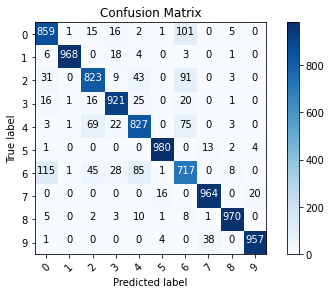

In [27]:
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm,classes,
                          normalize = False,
                          title = 'Confusion Matrix',
                          cmap = plt.cm.Blues):
  if normalize:
    cm = cm.astype('float')/cm.sum(axis=1)[:,np.newaxis]
    print('Normalized confusion matrix')
  else:
    print('Confusion matrix without normalization')
  
  print(cm)

  plt.imshow(cm,interpolation='nearest',cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks,classes,rotation=45)
  plt.yticks(tick_marks,classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max()/2.
  for i,j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
    plt.text(j,i,format(cm[i,j],fmt),
             horizontalalignment='center',
             color='white'if cm[i,j]>thresh else 'black')
  
  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()

p_test = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test,p_test)
plot_confusion_matrix(cm,list(range(10)))

In [0]:
labels = '''T-shirt/top
Trouser
Pullover
Dress
Coat
Sandal
Shirt
Sneaker
Bag
Ankle boot'''.split()

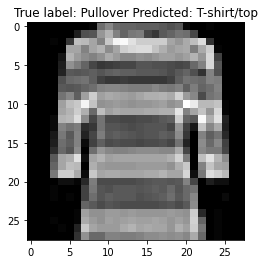

In [25]:
misclassified_idx = np.where(p_test!=y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i].reshape(28,28),cmap='gray')
plt.title("True label: %s Predicted: %s" % (labels[y_test[i]],labels[p_test[i]]));